<a href="https://colab.research.google.com/github/nisha432/global-terrorism-analysis/blob/main/Global_Terrorism_Analysis_by_NISHA_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

Terrorist attacks pose a great threat to global security, and their analysis and prediction are imperative. Considering the high frequency of terrorist attacks and the inherent difficulty in finding related terrorist organizations, I propose a classification framework based on ensemble learning for classifying and predicting most active terrorist organizations,world's terrorism hotspots,their target groups,their attack types ,weapons used and much more insights from the given database.






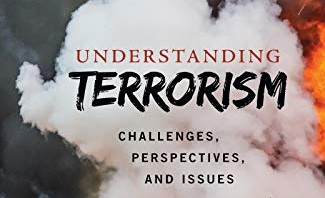

In [ ]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb
import plotly.express as px

In [ ]:
# Mounting Google Drive 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#Loading the data 
path='/content/drive/MyDrive/AlmaBetter/capstone project /Global Terrorism Data (2).csv'

In [ ]:
#Importing the data using read.csv
database=pd.read_csv(path,encoding='latin-1')

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


*NOTES-* The latin-1 encoding in Python implements ISO_8859-1:1987 which maps all possible byte values to the first 256 Unicode code points, and thus ensures decoding errors will never occur regardless of the configured error handler.

### ** KNOWING THE GLOBAL TERRORISM DATABASE **

In [ ]:
database.head(18161)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18156,198302220003,1983,2,22,NaN,0,NaN,45,Colombia,3,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN
18157,198302220004,1983,2,22,NaN,0,NaN,603,United Kingdom,8,...,NaN,NaN,NaN,NaN,PGIS,0,0,1,1,NaN
18158,198302220005,1983,2,22,NaN,0,NaN,61,El Salvador,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
18159,198302230001,1983,2,23,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN


In [ ]:
columns=list(database.columns)
columns

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

Data provided is huge consisting 18161 rows and 135 columns.

*** INSIGHTS OF DATABASE ***

**Attacktype1_txt** = The type of attack happened. Attacktype1_txt
consists of categories like explosion, armed assault,
assassination, kidnapping, unarmed assaults.

**Target1_txt** = Type of target involved in the attack. Target1_txt consists of categorical values like private citizens, military, police,
government officials, transportation, education, religious
institution, airports, etc.

**Success** =‘1’ if attack was a success. ‘0’ if attack was a failure.
Multiple Value for the number of attacks conducted in a single
terrorist event.

**Natlty1** = Nationality of the attacker.

**Weaptype1** = Type of weapon used in the attack. Weaptype1 contains
values like firearms, explosives, melee, vehicles etc.

**nkill** = Number of people killed in any event

**nwonded** = Number of people wounded in any event

**gname** = Organization that claimed responsibility of an attack

**Region_txt** = Name of the region where the attack happened. Region_txt
consists values like East Asia, South Asia, Western Europe,
etc

**Longitude** = Longitude of the location

**Latitude** = Latitude of the location

**Property** = Total property damage happened in any event

**Suicide** = ‘1’ if attack was a suicide attempt. ‘0’ if attack was not a
suicide attempt.

**Motive** = Known motive of the attacker


**Day**, **month**, **year** = Calendar details of the event.

In [ ]:
#shape of the given database
database.shape

(181691, 135)

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


Given dataset from the Global Terrorism Database have 135 columns,181691 rows and it is a mix of categorical and numeric values.


And given database is incomplete, inconsistent, contains many errors, missing attributes values, contains outliers, incorrect tags, and duplicate entries, name of the columns are not informatory enough to develop proper understanding. so, we will rename the columns ,ie Data preprocessing and this can help us to  resolve these discrepancies. and formation of informatory data so ,that we can  extract the required columns for exploring and analyzing the database,to discover the key findings pertaining to terrorist activities.

**DATA PREPROCESSING**

*   DATA CLEANING-
Removing missing values,and outliers 
*   DATA INTEGRATION-
Subcategories are put togeter to avoid the confusion.
*   DATA TRANSFORMATION-
aggregation of subtypes to represent one value by summation of all similar subtypes.
*   DIMENSION REDUCTION
removal of columns which carries less significance to our project.










In [ ]:
#Before cleaning the data, let's find out the total number of null values across different columns in the dataset.
database.isnull()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
1,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
2,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
3,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
4,False,False,False,False,True,False,True,False,False,False,...,True,True,True,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181687,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,True
181688,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True
181689,False,False,False,False,True,False,True,False,False,False,...,True,False,True,True,False,False,False,False,False,True


In [ ]:
 # count missing values 
 print(database.isnull().sum())
 print(database.isnull().values.sum())

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64
13853997


In [ ]:
#count non-missing values
print(database.count(axis=1))
print(database.count().sum())

0         45
1         52
2         47
3         47
4         45
          ..
181686    64
181687    67
181688    62
181689    59
181690    57
Length: 181691, dtype: int64
10674288


In [ ]:
#DATA CLEANING,ie droping the columns that has missing values and outliers
database.drop(['eventid','approxdate','resolution','specificity','vicinity','summary','crit1','crit2','crit3','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt'],axis=1,inplace=True)

In [ ]:
#Renaming the database 
database.rename(columns={'iyear':'year','imonth':'month','iday':'day','country_txt':'target country','provstate':'state','alternative_txt':'action type','attacktype1_txt':'attack type','targetype1':'target code','targtype1_txt':'target','natlty1_txt':'nationality','weaptype1_txt':'weapon used','nkill':'killed','nwound':'wounded' ,'region_txt':'area','gname':'organisation claimed responsibility of attack','propvalue':'property damaged value','doubtterr':'doubt is it terrorism attack','alternative':'incident other than terrorism' },inplace=True)

In [ ]:
database=database[['year','month','day','target country','state','city','longitude','latitude','location','action type','success','suicide','attack type','target','nationality','weapon used','killed','wounded','area','organisation claimed responsibility of attack','property damaged value','doubt is it terrorism attack','incident other than terrorism','motive']]

In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 24 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   year                                           181691 non-null  int64  
 1   month                                          181691 non-null  int64  
 2   day                                            181691 non-null  int64  
 3   target country                                 181691 non-null  object 
 4   state                                          181270 non-null  object 
 5   city                                           181257 non-null  object 
 6   longitude                                      177134 non-null  float64
 7   latitude                                       177135 non-null  float64
 8   location                                       55495 non-null   object 
 9   action type                          

In [ ]:
#filling the non-null values
database['state'] = database['state'].fillna('others')
database['city']=database['city'].fillna('others')
database['longitude'] = database['longitude'].fillna('unknown')
database['latitude'] = database['latitude'].fillna('unknown')
database['location']=database['location'].fillna('not known')
database['action type'] =database['action type'].fillna('not known')
database['nationality'] =database['nationality'].fillna('not known')
database['killed'] = database['killed'].fillna('0.0')
database['wounded'] = database['wounded'].fillna('0.0')
database['property damaged value'] = database['property damaged value'].fillna('no data available')
database['doubt is it terrorism attack'] = database['doubt is it terrorism attack'].fillna('0')
database['incident other than terrorism']=database['incident other than terrorism'].fillna('not known')
database['motive']=database['motive'].fillna('not known')

<ipython-input-84-8ea1e8c9bc8e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['state'] = database['state'].fillna('others')
<ipython-input-84-8ea1e8c9bc8e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['city']=database['city'].fillna('others')


In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 24 columns):
 #   Column                                         Non-Null Count   Dtype 
---  ------                                         --------------   ----- 
 0   year                                           181691 non-null  int64 
 1   month                                          181691 non-null  int64 
 2   day                                            181691 non-null  int64 
 3   target country                                 181691 non-null  object
 4   state                                          181691 non-null  object
 5   city                                           181691 non-null  object
 6   longitude                                      181691 non-null  object
 7   latitude                                       181691 non-null  object
 8   location                                       181691 non-null  object
 9   action type                                    1

In [ ]:
database.isnull().sum()

year                                             0
month                                            0
day                                              0
target country                                   0
state                                            0
city                                             0
longitude                                        0
latitude                                         0
location                                         0
action type                                      0
success                                          0
suicide                                          0
attack type                                      0
target                                           0
nationality                                      0
weapon used                                      0
killed                                           0
wounded                                          0
area                                             0
organisation claimed responsibi

There are no null values over the entire data.


In [ ]:
#final database
database.head(181691)

,year,month,day,target country,state,city,longitude,latitude,location,action type,...,nationality,weapon used,killed,wounded,area,organisation claimed responsibility of attack,property damaged value,doubt is it terrorism attack,incident other than terrorism,motive
0,1970,7,2,Dominican Republic,others,Santo Domingo,-69.951164,18.456792,not known,not known,...,Dominican Republic,Unknown,1.0,0.0,Central America & Caribbean,MANO-D,no data available,0.0,not known,not known
1,1970,0,0,Mexico,Federal,Mexico city,-99.086624,19.371887,not known,not known,...,Belgium,Unknown,0.0,0.0,North America,23rd of September Communist League,no data available,0.0,not known,not known
2,1970,1,0,Philippines,Tarlac,Unknown,120.599741,15.478598,not known,not known,...,United States,Unknown,1.0,0.0,Southeast Asia,Unknown,no data available,0.0,not known,not known
3,1970,1,0,Greece,Attica,Athens,23.762728,37.99749,not known,not known,...,United States,Explosives,0.0,0.0,Western Europe,Unknown,no data available,0.0,not known,not known
4,1970,1,0,Japan,Fukouka,Fukouka,130.396361,33.580412,not known,not known,...,United States,Incendiary,0.0,0.0,East Asia,Unknown,no data available,-9.0,not known,not known
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,Somalia,Middle Shebelle,Ceelka Geelow,45.385034,2.359673,The incident occurred near the town of Balcad.,Insurgency/Guerilla Action,...,Somalia,Firearms,1.0,2.0,Sub-Saharan Africa,Al-Shabaab,no data available,1.0,1.0,not known
181687,2017,12,31,Syria,Lattakia,Jableh,35.942679,35.407278,The incident occurred at the Humaymim Airport.,Insurgency/Guerilla Action,...,Russia,Explosives,2.0,7.0,Middle East & North Africa,Muslim extremists,-99.0,1.0,1.0,not known
181688,2017,12,31,Philippines,Maguindanao,Kubentog,124.437908,6.900742,The incident occurred in the Datu Hoffer distr...,not known,...,Philippines,Incendiary,0.0,0.0,Southeast Asia,Bangsamoro Islamic Freedom Movement (BIFM),-99.0,0.0,not known,not known
181689,2017,12,31,India,Manipur,Imphal,93.94043,24.798346,The incident occurred in the Mantripukhri neig...,not known,...,India,Explosives,0.0,0.0,South Asia,Unknown,no data available,0.0,not known,not known


In [ ]:
# Statical inference from the database
database.describe(include='all')

,year,month,day,target country,state,city,longitude,latitude,location,action type,...,nationality,weapon used,killed,wounded,area,organisation claimed responsibility of attack,property damaged value,doubt is it terrorism attack,incident other than terrorism,motive
count,181691.000000,181691.000000,181691.000000,181691,181691,181691,181691.000000,181691.000000,181691,181691,...,181691,181691,181691.0,181691.0,181691,181691,181691,181691.0,181691,181691
unique,NaN,NaN,NaN,205,2856,36675,48040.000000,48323.000000,44110,6,...,216,12,206.0,239.0,12,3537,660,4.0,6,14491
top,NaN,NaN,NaN,Iraq,Baghdad,Unknown,44.371773,33.303566,not known,not known,...,Iraq,Explosives,0.0,0.0,Middle East & North Africa,Unknown,no data available,0.0,not known,not known
freq,NaN,NaN,NaN,24636,7645,9775,7521.000000,7521.000000,126196,152680,...,24113,92426,88149.0,103275.0,50474,82782,142702,138905.0,152680,131130
mean,2002.638997,6.467277,15.505644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,13.259430,3.388303,8.814045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1970.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1991.000000,4.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2009.000000,6.000000,15.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014.000000,9.000000,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Dimensions after cleaning
database.shape

(181691, 24)

**EXPLORATORY DATA ANALYSIS** 

QUESTION 1-

FIND OUT NUMBER OF ACTIVE TERRORIST GROUPS WHICH ARE SPREADING THE THREAT OF TERRORISM ACROSS THE WORLD AND ALSO DETECT MOST ACTIVE ORGANISATION WHO HAS TAKEN RESPONSIBILITY OF ATTACKS.

In [ ]:
#extract the column
organization_taken_responsibility=database.loc[:,'organisation claimed responsibility of attack']
print(organization_taken_responsibility)

0                                             MANO-D
1                 23rd of September Communist League
2                                            Unknown
3                                            Unknown
4                                            Unknown
                             ...                    
181686                                    Al-Shabaab
181687                             Muslim extremists
181688    Bangsamoro Islamic Freedom Movement (BIFM)
181689                                       Unknown
181690                                       Unknown
Name: organisation claimed responsibility of attack, Length: 181691, dtype: object


In [ ]:
#unique values from a series. 
database['organisation claimed responsibility of attack'].unique()

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

In [ ]:
# count of unique values from a series. 
database['organisation claimed responsibility of attack'].nunique()

3537

There are 3537 active organizations that are claimings the attack.

In [ ]:
# finding out the top most active organizations claiming attacks.
z=database['organisation claimed responsibility of attack'].value_counts().head(10)
print(z)

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: organisation claimed responsibility of attack, dtype: int64


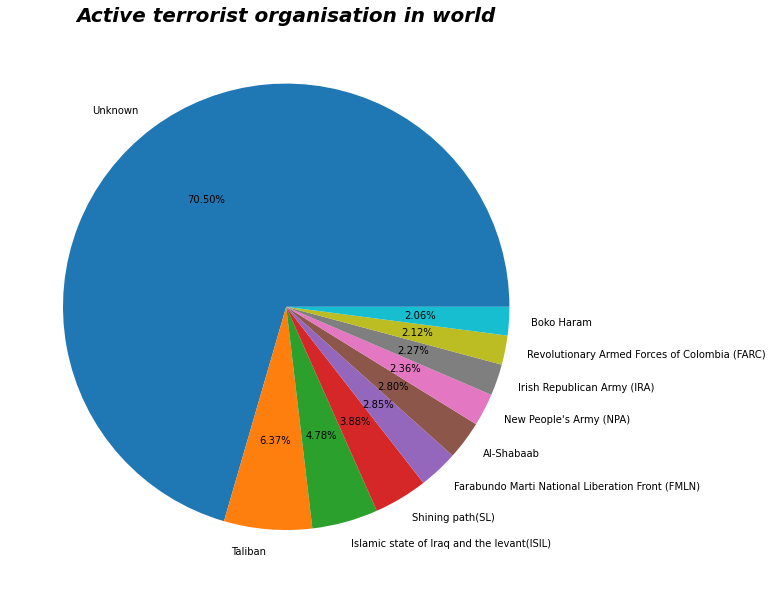

In [ ]:
groups=['Unknown','Taliban','Islamic state of Iraq and the levant(ISIL)','Shining path(SL)',
        'Farabundo Marti National Liberation Front (FMLN)','Al-Shabaab',"New People's Army (NPA)",
        'Irish Republican Army (IRA)','Revolutionary Armed Forces of Colombia (FARC)','Boko Haram',]
data=[82782,7478,5613,4555,3351,3288,2772,2671,2487,2418]                                                      
fig = plt.figure(figsize =(10, 15))
colors = snb.color_palette('bright')
plt.pie(data,labels = groups,autopct='%1.2f%%')
plt.title('Active terrorist organisation in world',fontdict={'fontsize':20,'fontweight':'bold','fontstyle':'oblique'})
plt.show()

In the given data, most of the attacks are claimed by "Taliban" with 6.37% and 70.50% attacks are claimed by unknown groups.
so,we should pay more attention on the  minor and major activities of Taliban by the Research and Analysis Wings.


QUESTION NO.2-

Find out the success rate of terrorist attacks and country ,city which is mostly targeted by the terrorist organisations

In [ ]:
database['success'].value_counts()

1    161632
0     20059
Name: success, dtype: int64

In [ ]:
total_attacks=database['success'].count()

In [ ]:
successful_attacks=161632
unsuccessful_attacks=20059
success_rate=successful_attacks/total_attacks*100
print(success_rate)

88.95982739926579


In [ ]:
unsuccess_rate=unsuccessful_attacks/total_attacks*100
print(unsuccess_rate)

11.040172600734213


Terrorists have 88.96% of success rate which is a huge number,it denotes that we should be extra causious regarding their targets countries, so that we can be prepared to counter the attack


In [ ]:
a=database['target country'].value_counts().head(10)
print(a)

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: target country, dtype: int64


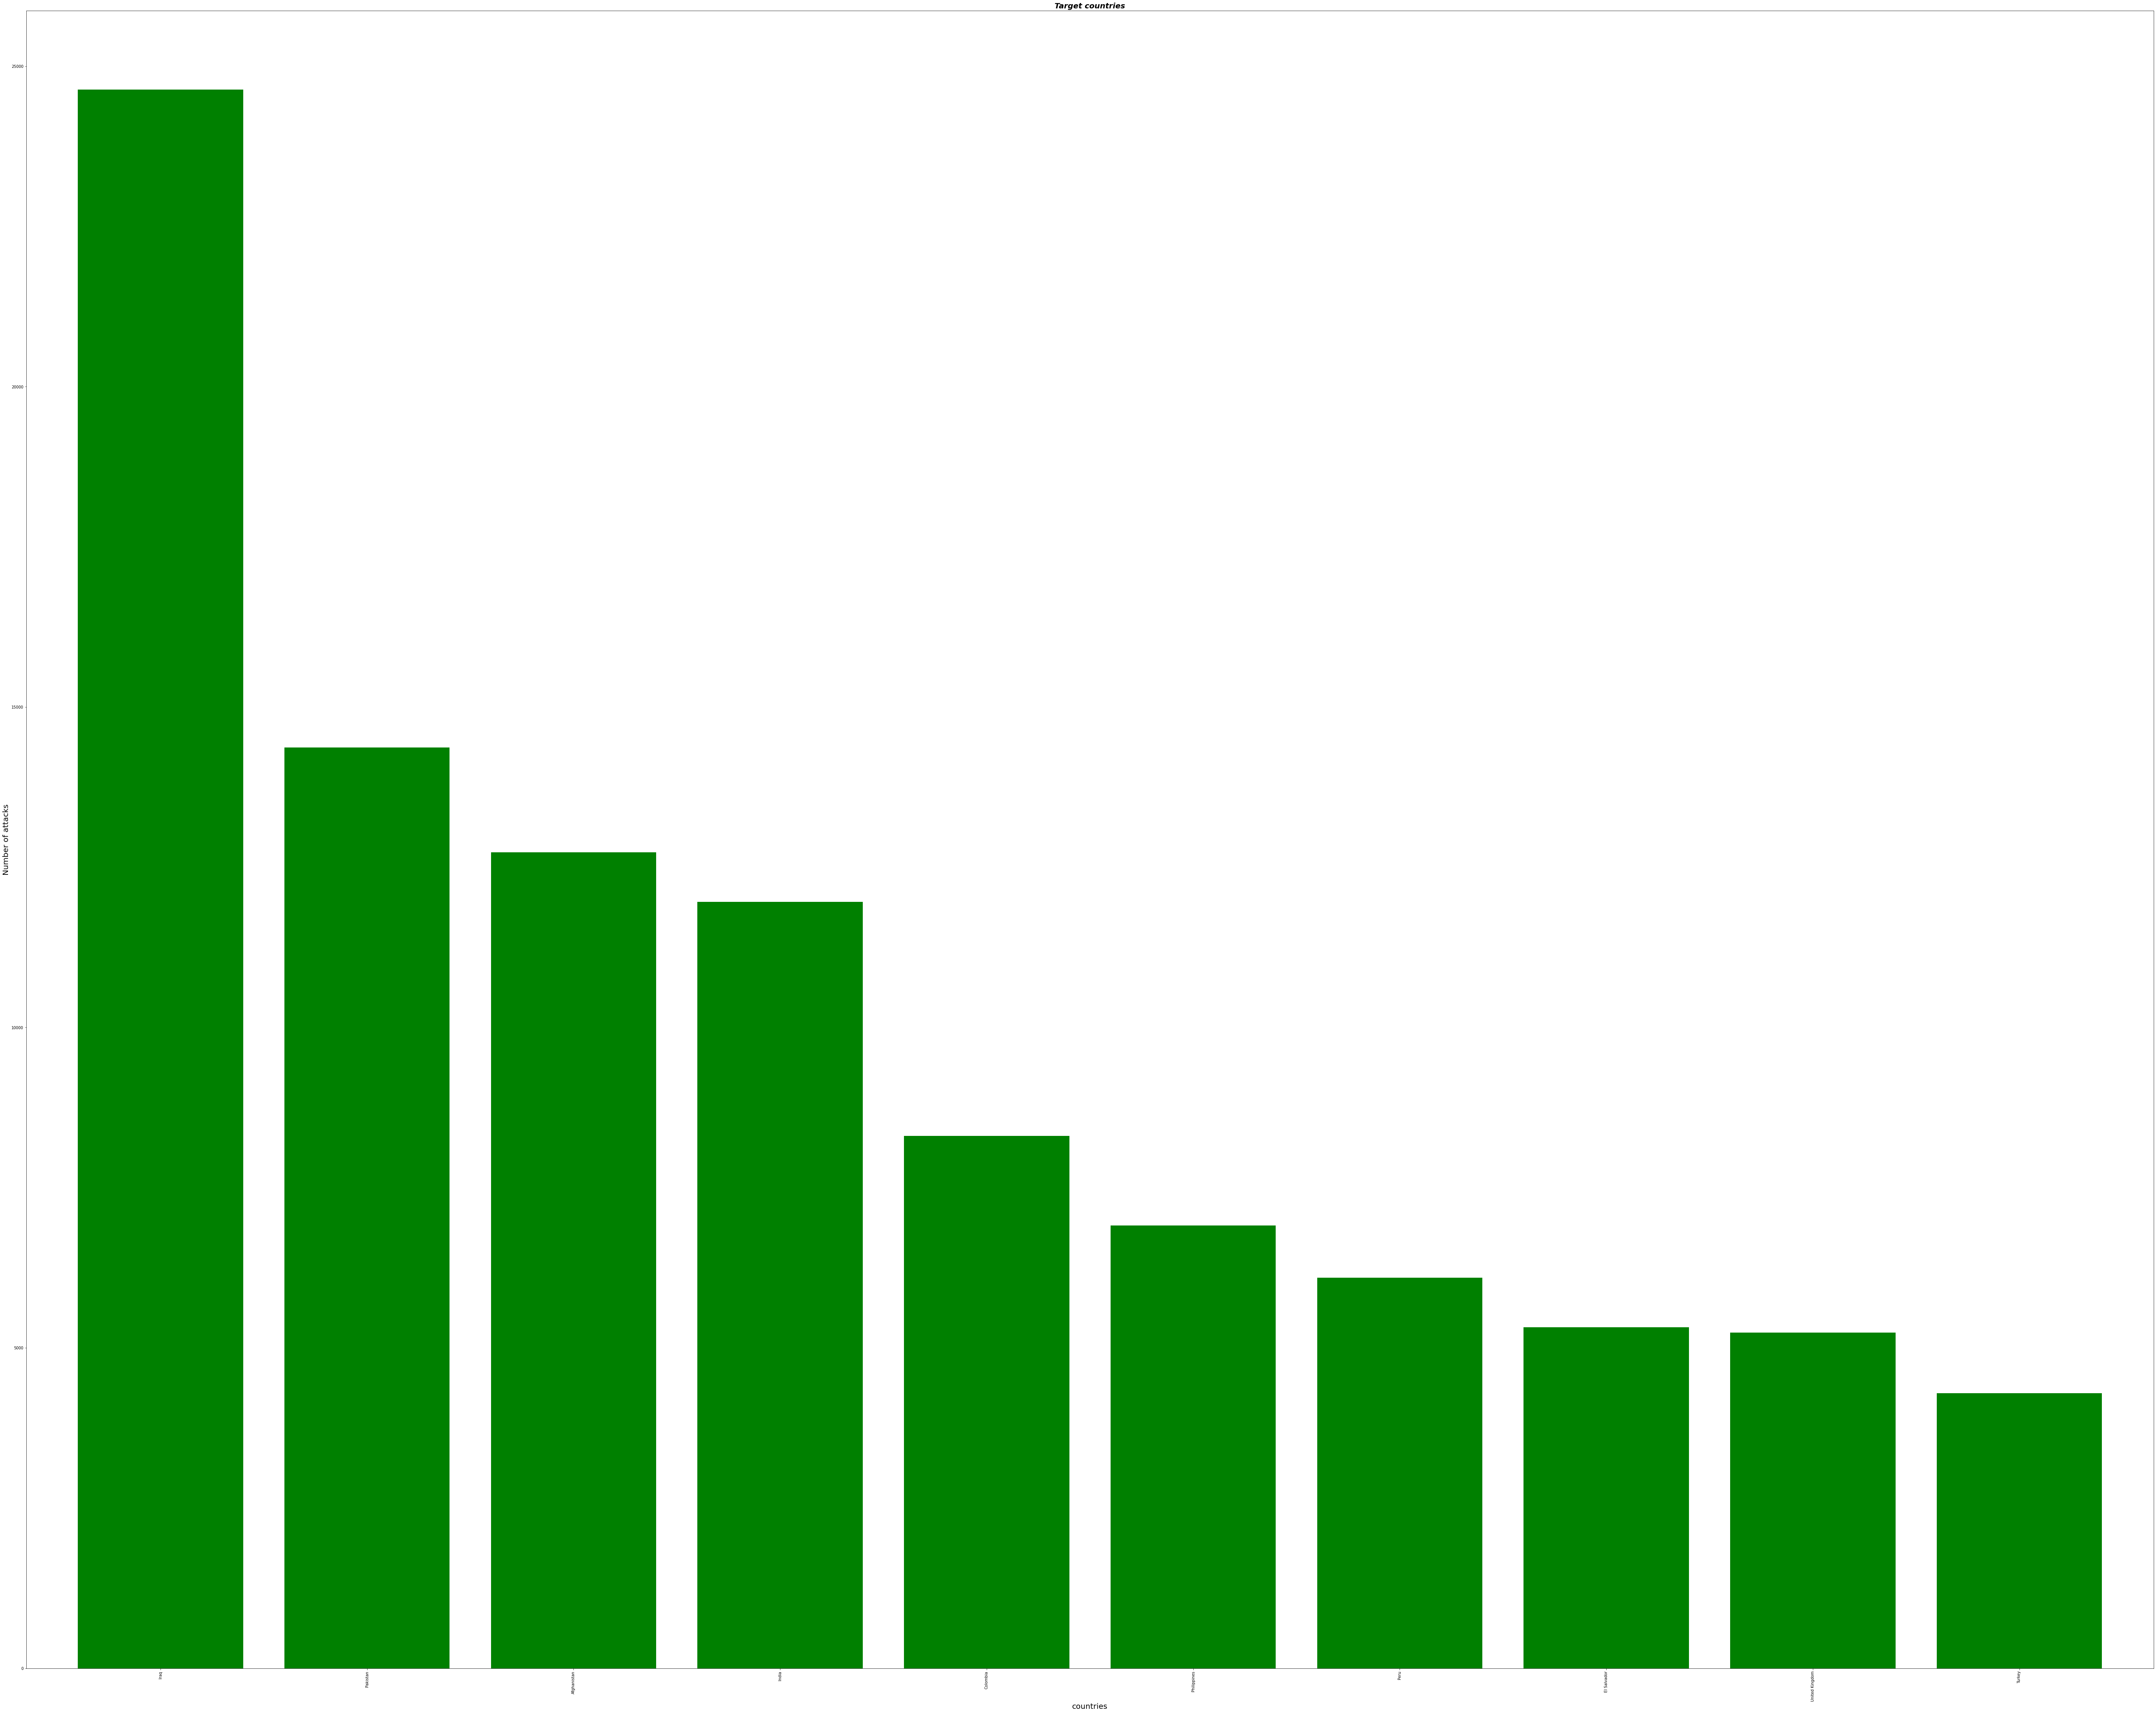

In [ ]:
# Create the plot object
a.plot(kind='bar',color='green',width=0.8)
plt.title('Target countries',fontdict={'fontsize':20,'fontweight':'bold','fontstyle':'oblique'})
plt.ylabel('Number of attacks',fontdict={'fontsize':20,'fontweight':'normal'})
plt.xlabel('countries',fontdict={'fontsize':20,'fontweight':'normal'})
plt.rcParams['figure.figsize'] = (10,10)


In [ ]:
a=database['city'].value_counts().head(10)
print(a)

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64


Iraq is the most affected country by terrorist attack.and bagdad is the most affected city of Iraq, so we should be extra vigilant for suspicious situations,in this country.And we should also take care about the countries like Pakistan,India,Columbia as this are the top 5 targeted countries by the terrorist groups.

QUESTION-3

Finding out the pattern in the growth of number of attacks in following years 

In [ ]:
#extract the columns 
database.loc[:,'year']

0         1970
1         1970
2         1970
3         1970
4         1970
          ... 
181686    2017
181687    2017
181688    2017
181689    2017
181690    2017
Name: year, Length: 181691, dtype: int64

In [ ]:
database['year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017])

In [ ]:
database['year'].nunique()

47

we have the data of 47 years ,i.e from 1970 to 2017.

In [ ]:
years=database['year'].unique()
print(years)
number_of_attacks=list(database['year'].value_counts(ascending=True).sort_index(ascending=True))
print(number_of_attacks)

[1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1986 1982
 1983 1984 1985 1987 1988 1989 1990 1991 1992 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017]
[651, 471, 568, 473, 581, 740, 923, 1319, 1526, 2662, 2662, 2586, 2544, 2870, 3495, 2915, 2860, 3183, 3721, 4324, 3887, 4683, 5071, 3456, 3081, 3058, 3197, 934, 1395, 1814, 1906, 1333, 1278, 1166, 2017, 2758, 3242, 4805, 4721, 4826, 5076, 8522, 12036, 16903, 14965, 13587, 10900]


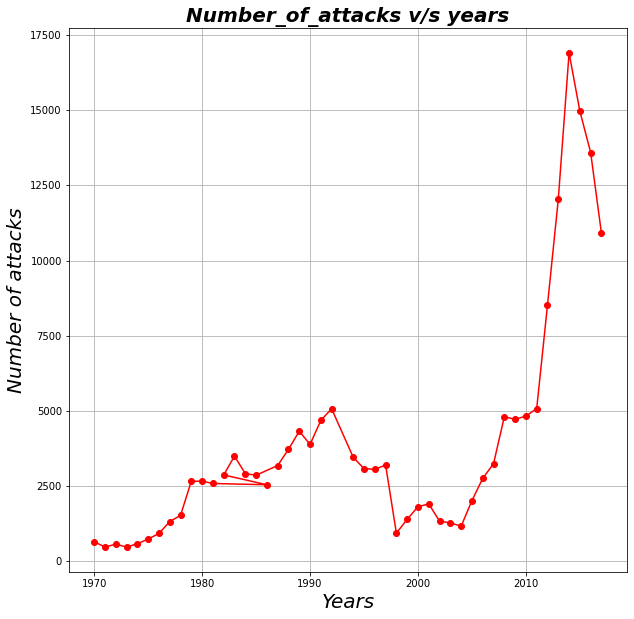

In [ ]:
plt.plot(years,number_of_attacks,color='red', marker='o')
plt.title('Number_of_attacks v/s years',fontdict={'fontsize':20,'fontweight':'bold','fontstyle':'oblique'})
plt.xlabel('Years',fontdict={'fontsize':20,'fontweight':'normal','fontstyle':'oblique'})
plt.ylabel('Number of attacks',fontdict={'fontsize':20,'fontweight':'normal','fontstyle':'oblique'})
plt.grid(True)
plt.show()

Summarizing all the terrorist attacks over the years can provide us an idea about
how terrorism has evolved and what rate has it impacted the world each year.Graph
shows data from 1970 to 2017 for the total number of attacks happened each year. Terrorist
attacks were quite low in numbers in the year 1970. Terrorism then had a fairly rise
in the 1980s and early 1990s and was considerably low in the next decade but then terrorism has substantially 
rose from early the 2005 and highest attacks were in 2014.

QUESTION-4

Hostile
environment and global tension have increased because of the number of attacks in recent
years.so its very necessary to find out the weapons used behind this attack


In [ ]:
weapon=list(database['weapon used'].unique())

In [ ]:
weapon

['Unknown',
 'Explosives',
 'Incendiary',
 'Firearms',
 'Chemical',
 'Melee',
 'Sabotage Equipment',
 'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
 'Fake Weapons',
 'Radiological',
 'Other',
 'Biological']

In [ ]:
b=database['weapon used'].value_counts().head(10)
print(b)

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Name: weapon used, dtype: int64


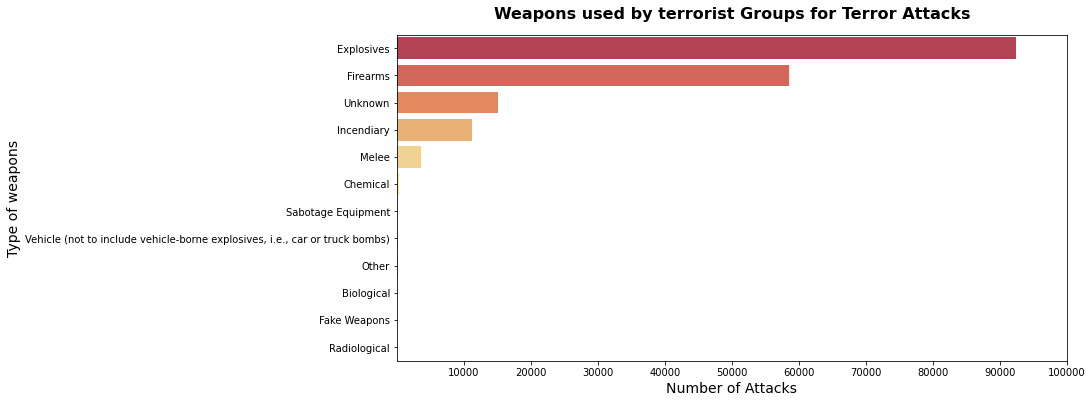

In [ ]:
# Most No of attacks by various Terrorist Groups
plt.subplots(figsize=(12,6))
bar = snb.barplot(x=database['weapon used'].value_counts(), y=database['weapon used'].value_counts().index[0:15],palette=('Spectral'))
plt.xlabel('Number of Attacks', fontsize=14)
plt.xticks([10000,20000,30000,40000,50000,60000,70000,80000,90000,100000])
plt.ylabel('Type of weapons', fontsize=14)
bar.set_title('Weapons used by terrorist Groups for Terror Attacks',fontdict={'fontsize':16,'fontweight':'bold'}, y=1.03);

In the following graph we can see that Explosives are used at maximum times for the attacks,it shows that the terrorist groups are very much aware with the use of explosives,and may have the reservoirs of explosives in abundance.Terrorist groups are also awared about firearms,incendiary,melee.
Many other types of weapons are also used by them,but they are in very less number as compared to above mentioned weapons,so in this graph they are shown as blank.




In [ ]:
less_weapons_used=database['weapon used'].value_counts().tail(7)
less_weapons_used

Chemical                                                                       321
Sabotage Equipment                                                             141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)    136
Other                                                                          114
Biological                                                                      35
Fake Weapons                                                                    33
Radiological                                                                    14
Name: weapon used, dtype: int64

QUESTION-5

Find out the favourable attacking type ,used by terrorist to spread the antagonistic psychology of terrorism in the society.

In [ ]:
attacktype=database.loc[:,'attack type']

In [ ]:
database['attack type'].unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [ ]:
database['attack type'].nunique()

9

Terrorist has used 9 different kinds of attacking habit,for creating the hostile environment in peoples in different country.

In [ ]:
b=database['attack type'].value_counts().head(9)
print(b)

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attack type, dtype: int64


In [ ]:
attacking_type=database['attack type'].unique()
print(attacking_type)
number_of_attacks=[19312,11158,88255,10356,42669,659,7276,1015,991]
print(number_of_attacks)

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']
[19312, 11158, 88255, 10356, 42669, 659, 7276, 1015, 991]


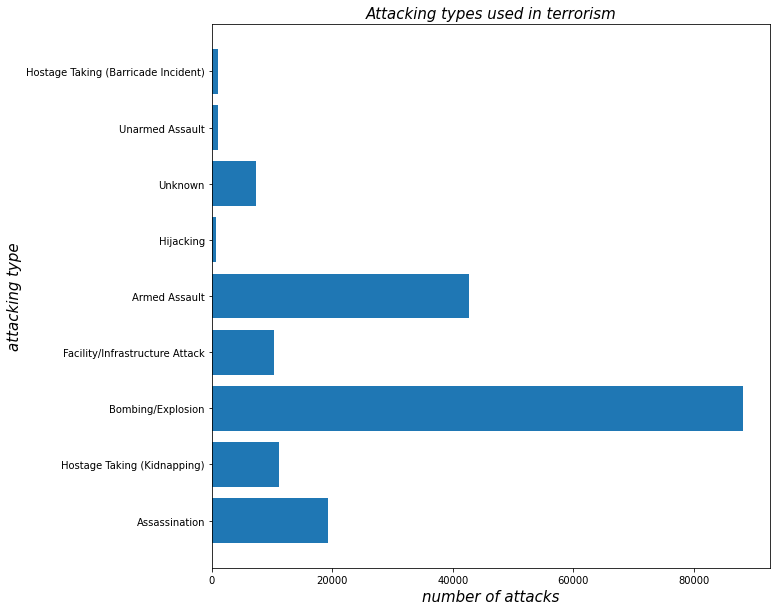

In [ ]:
plt.barh(attacking_type,number_of_attacks)
 # setting label of y-axis
plt.ylabel("attacking type",fontdict={'fontsize':15,'fontweight':'normal','fontstyle':'oblique'})
 # setting label of x-axis
plt.xlabel("number of attacks",fontdict={'fontsize':15,'fontweight':'normal','fontstyle':'oblique'})
plt.title("Attacking types used in terrorism",fontdict={'fontsize':15,'fontweight':'normal','fontstyle':'oblique'})
plt.show()

Bombing is the favourite attacking style of terrorist ,as they have used this specific style in highest number of attacks.

QUESTION 6

Find out the favourable targets of terrorist organisation ,and also estimate the harm caused by their attacks

In [ ]:
targetData = database.loc[:,'target']

In [ ]:
target_data=database['target'].value_counts()
target_data

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: target, dtype: int64

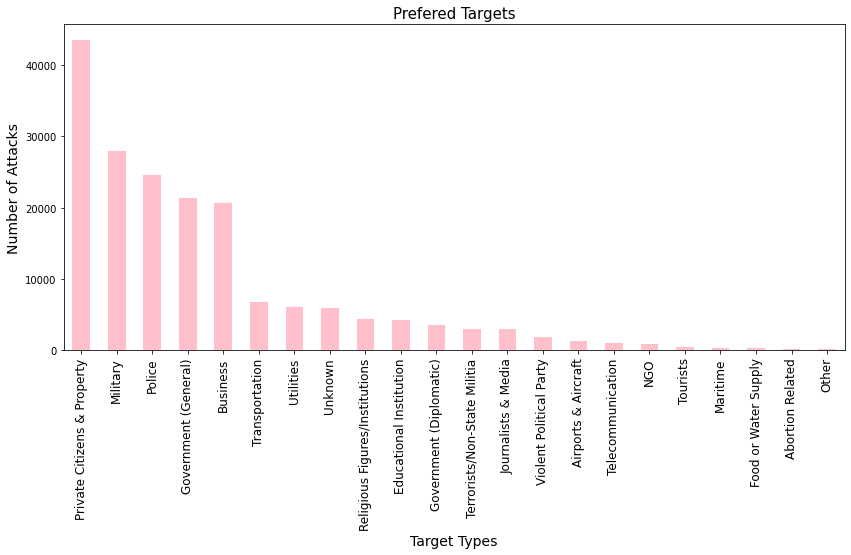

In [ ]:
# Plotting the Target Types in the attacks
plt.subplots(figsize=[14,6])
target_data.plot(kind='bar',color='pink')
plt.xlabel('Target Types',fontsize = 14)
plt.ylabel('Number of Attacks',fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)
plt.title('Prefered Targets', fontsize = 15);

 Analyzing
the type of target will help us understand their objective and most likely their motives.
Terrorism is driven by an ideology that tries to make a change or impose an
ideology therefore terrorist are attacking mostly on private citizens and property as the citizens are the largest part of the country.



In [ ]:
nationality_data=database['nationality'].value_counts().head(20)

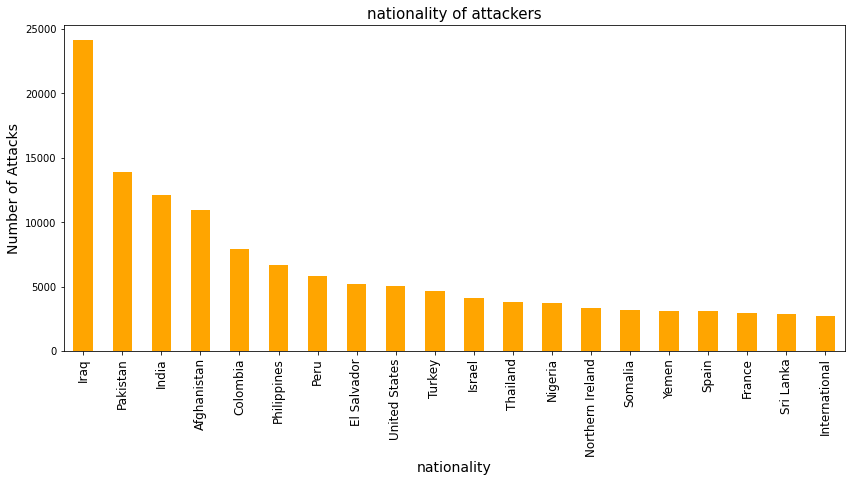

In [ ]:
# Plotting the nationality of attackers
plt.subplots(figsize=[14,6])
nationality_data.plot(kind='bar',color='orange')
plt.xlabel('nationality',fontsize = 14)
plt.ylabel('Number of Attacks',fontsize = 14)
plt.xticks(rotation = 90, fontsize = 12)
plt.title('nationality of attackers', fontsize = 15);

As the graph is showing that most of the attackers belong to Iraq. and Iraq is indubitably one of the countries most affected by terrorism.So,Iraq should aim to develop and implement comprehensive national responses to prevent and counter-terrorism .

QUESTION-7

FINDING OUT THE TARGETS IN PARTICULAR CONTRIES.SO THAT WE CAN FOCUS MORE ON THE MOTIVE AND OBJECTIVE OF THE TERRORIST ATTACK ON THE COUNTRY.

In [ ]:
x=database.groupby(['nationality','target'])['nationality'].count().unstack()
x

target,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
nationality,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,59.0,389.0,327.0,13.0,36.0,1630.0,64.0,NaN,1452.0,...,3554.0,2656.0,239.0,69.0,128.0,NaN,146.0,31.0,37.0,22.0
Albania,NaN,NaN,9.0,2.0,NaN,6.0,32.0,3.0,NaN,1.0,...,12.0,18.0,1.0,NaN,NaN,NaN,8.0,4.0,1.0,NaN
Algeria,NaN,12.0,157.0,66.0,2.0,25.0,169.0,70.0,NaN,407.0,...,565.0,882.0,26.0,20.0,28.0,6.0,106.0,78.0,36.0,3.0
Angola,NaN,9.0,29.0,1.0,6.0,2.0,13.0,2.0,1.0,28.0,...,13.0,120.0,4.0,NaN,NaN,NaN,17.0,NaN,175.0,8.0
Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Yugoslavia,NaN,4.0,11.0,1.0,1.0,31.0,12.0,1.0,NaN,4.0,...,26.0,19.0,3.0,NaN,NaN,5.0,6.0,NaN,1.0,NaN
Zaire,NaN,1.0,2.0,NaN,NaN,2.0,7.0,4.0,NaN,1.0,...,1.0,6.0,2.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN
Zambia,NaN,NaN,5.0,NaN,2.0,1.0,6.0,2.0,NaN,NaN,...,NaN,24.0,NaN,NaN,NaN,NaN,6.0,NaN,NaN,7.0


In [ ]:
y=database.groupby(['nationality','target'])['nationality'].count()
y

nationality  target                 
Afghanistan  Airports & Aircraft         59
             Business                   389
             Educational Institution    327
             Food or Water Supply        13
             Government (Diplomatic)     36
                                       ... 
not known    Tourists                    14
             Transportation              29
             Unknown                    993
             Utilities                    6
             Violent Political Party      2
Name: nationality, Length: 2393, dtype: int64

In [ ]:
x.columns

Index(['Abortion Related', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Food or Water Supply',
       'Government (Diplomatic)', 'Government (General)',
       'Journalists & Media', 'Maritime', 'Military', 'NGO', 'Other', 'Police',
       'Private Citizens & Property', 'Religious Figures/Institutions',
       'Telecommunication', 'Terrorists/Non-State Militia', 'Tourists',
       'Transportation', 'Unknown', 'Utilities', 'Violent Political Party'],
      dtype='object', name='target')

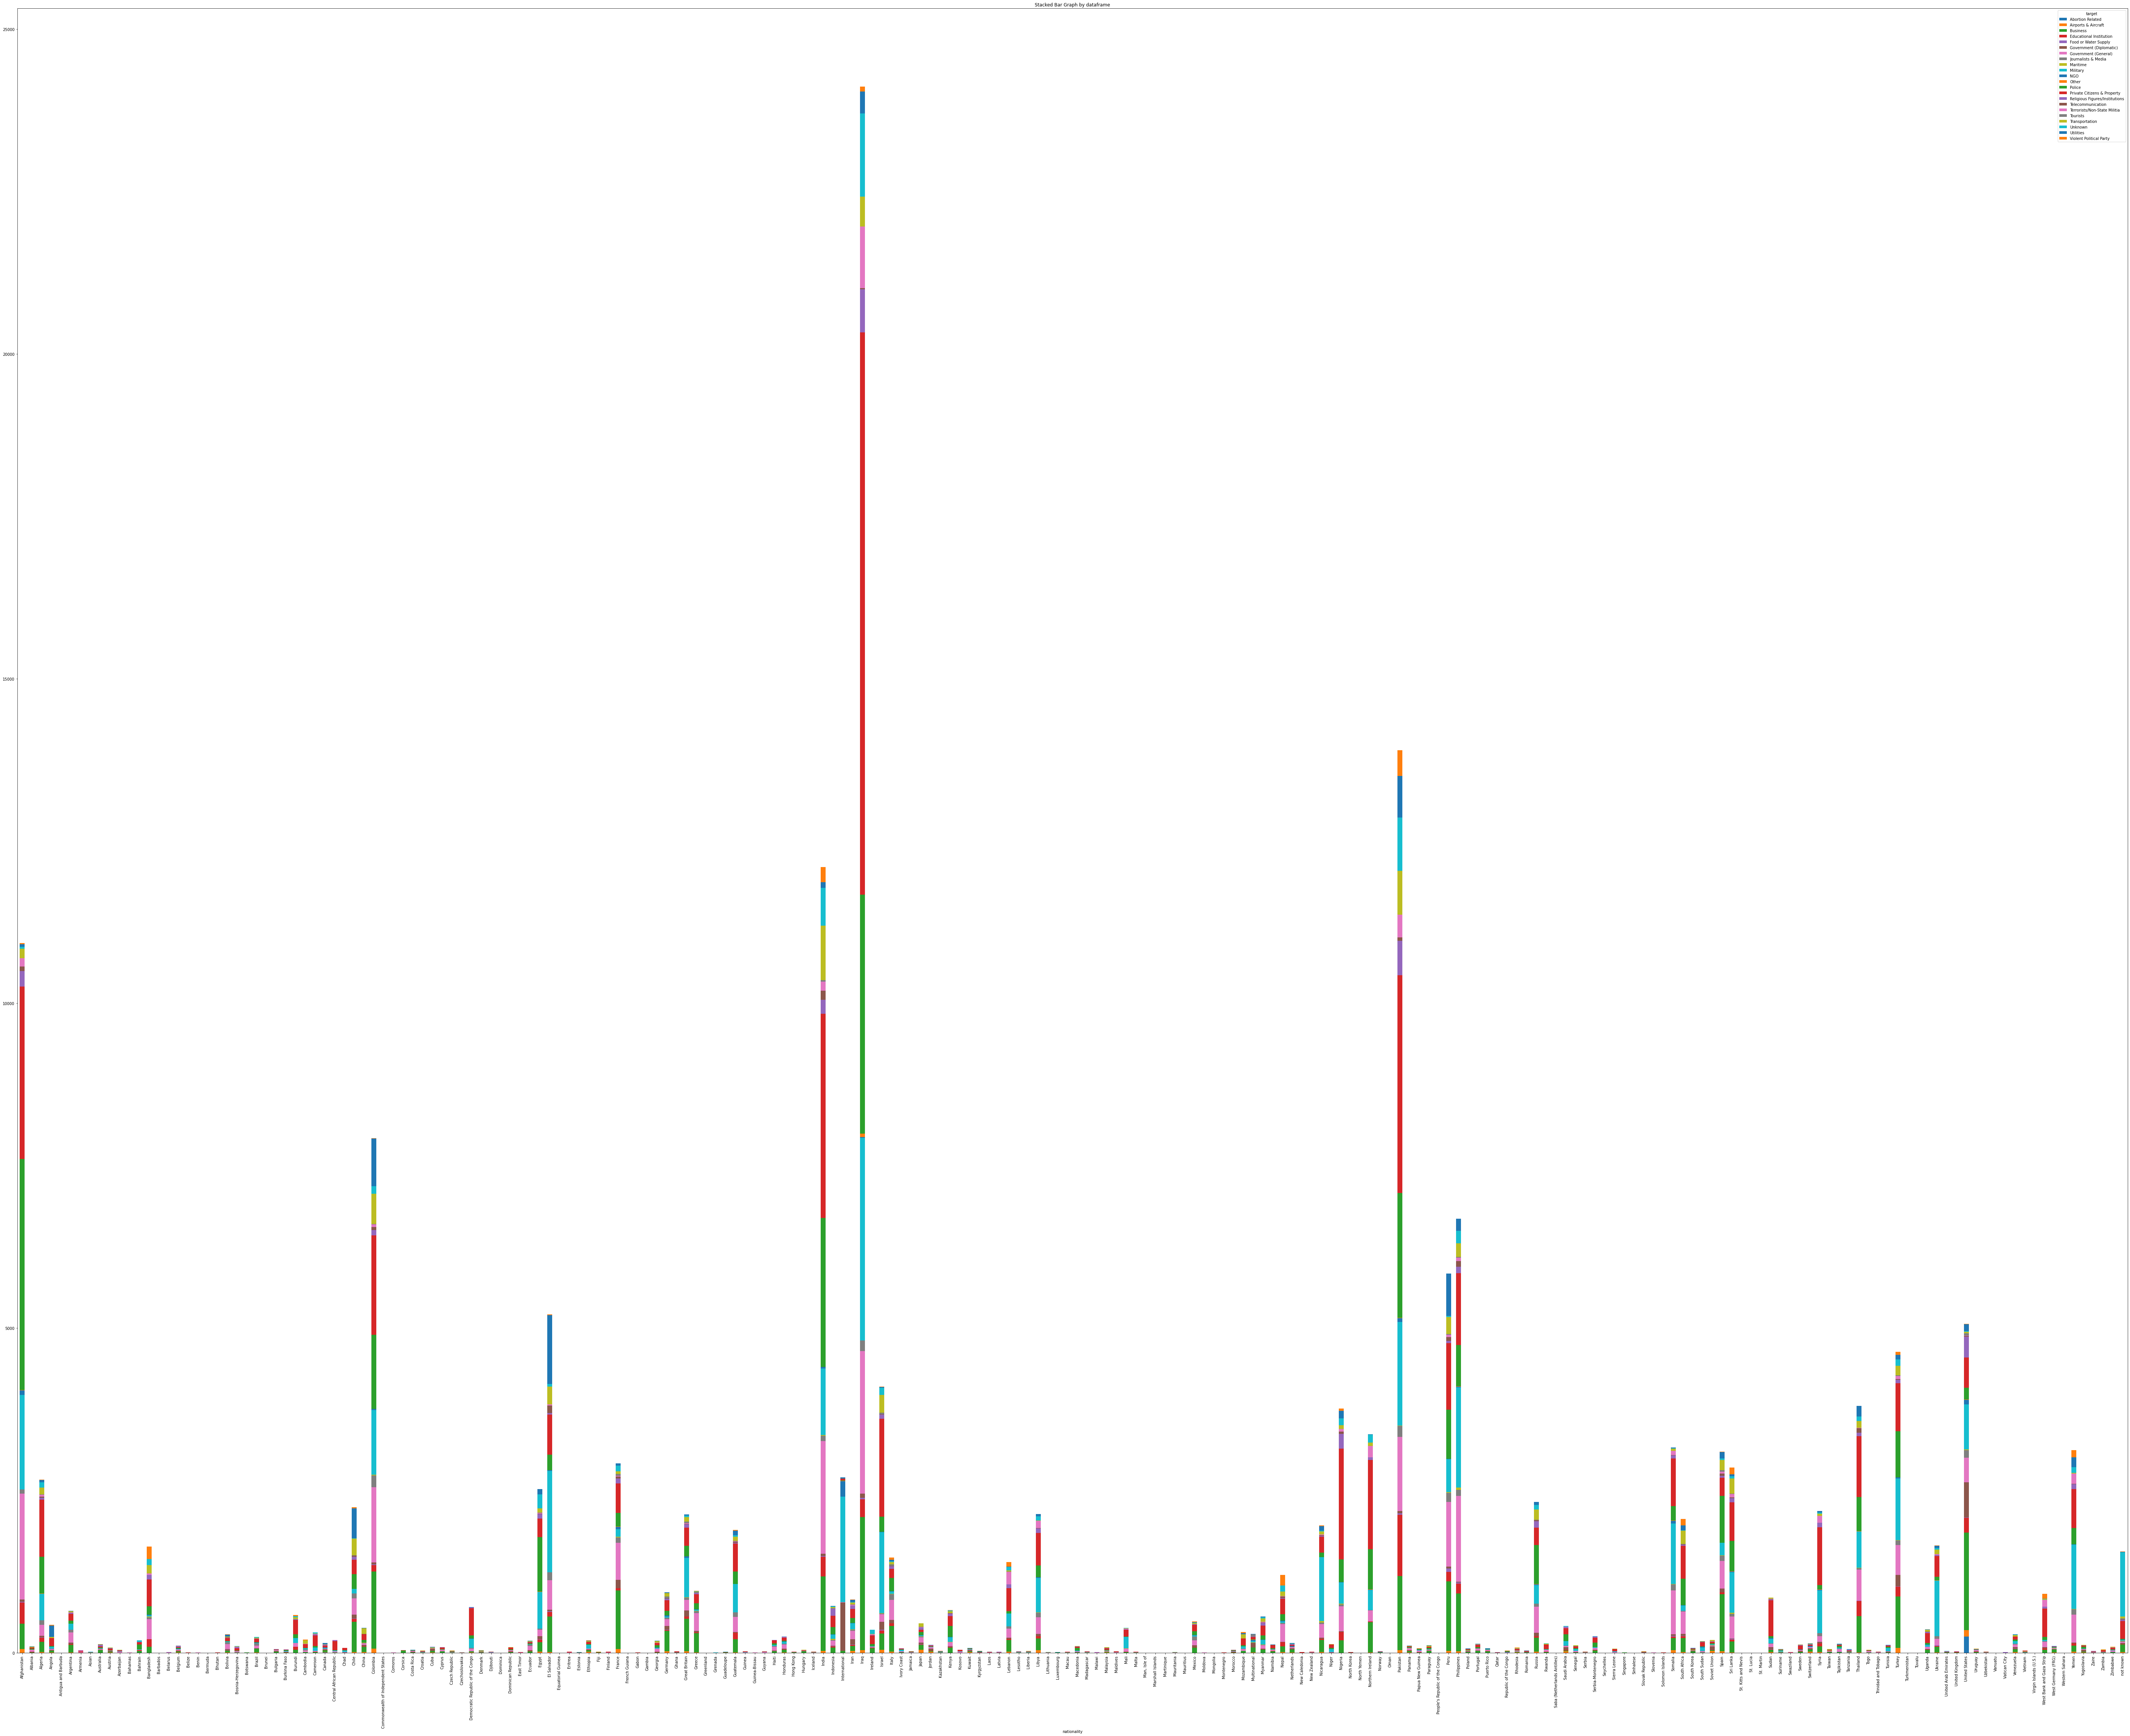

In [127]:
x.plot( kind='bar', stacked=True,title='Stacked Bar Graph by dataframe')
plt.rcParams['figure.figsize'] = [100,80]
plt.show()

**CONCLUSION**

The goal of this project was to understand and
interpret the nature of terrorism.
After doing the analysis we founded the following insights from the database


1. TALIBAN is the most active organisation who is taking responsibility of many of the attacks that had happened in the world.

2. IRAQ is the most affected by the attacks,so security groups should be extra cautious in this country.

1. IN 2014,maximum number of attacks has taken palce in the world,so it was the dark year of terrorism.

2.   IT is seen from the database that the explosives were majorly used by the
terrorist groups for the attacks.so security groups should try to  locate  their sources from where they acquire this explosives.

1.  After doing the analysis we founded that that citizens are the major targets of the terrorist group ,and the noticable part is that IRAQ is most affected by the terrorist groups,and maximum number of member of terrorist group belong to the nationality of IRAQ.








